Dataset Shape: (20640, 9)

Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Statistical Summary:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  


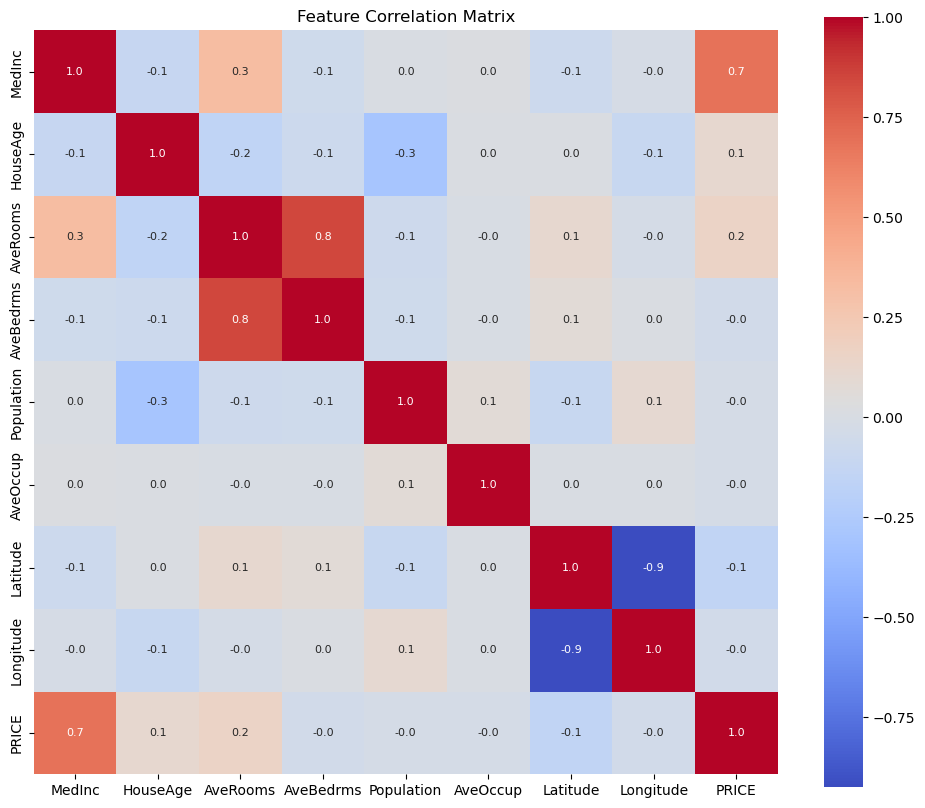


Training Linear Regression...

Training Ridge Regression...

Training Lasso Regression...

Training Elastic Net...

Linear Regression - Cross-Validated RMSE: 0.75 ± 0.04

Ridge Regression - Cross-Validated RMSE: 0.75 ± 0.04

Lasso Regression - Cross-Validated RMSE: 0.81 ± 0.05

Elastic Net - Cross-Validated RMSE: 0.77 ± 0.05

Evaluating Linear Regression...

Linear Regression - Training Metrics:
R²: 0.6126
MAE: 0.5286
MSE: 0.5179
RMSE: 0.7197
MAPE: 31.50%

Linear Regression - Test Metrics:
R²: 0.5758
MAE: 0.5332
MSE: 0.5559
RMSE: 0.7456
MAPE: 31.95%


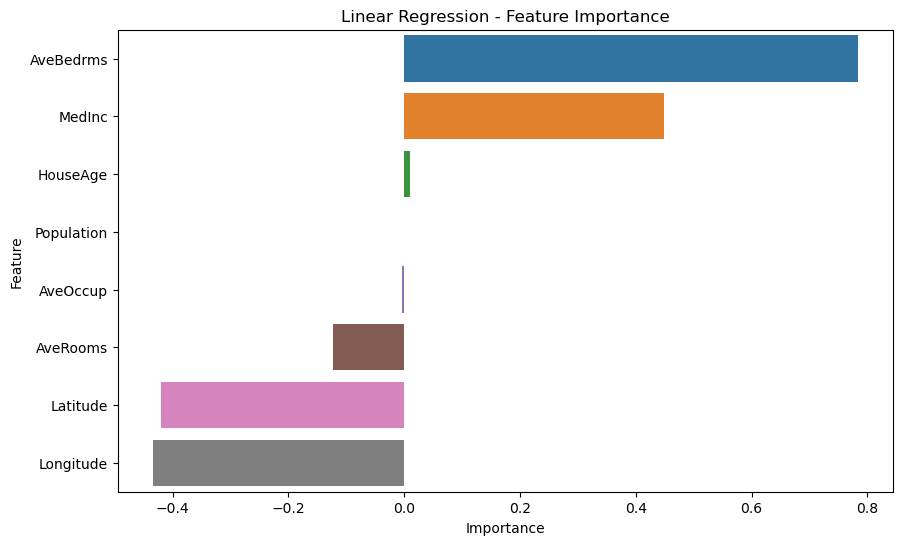

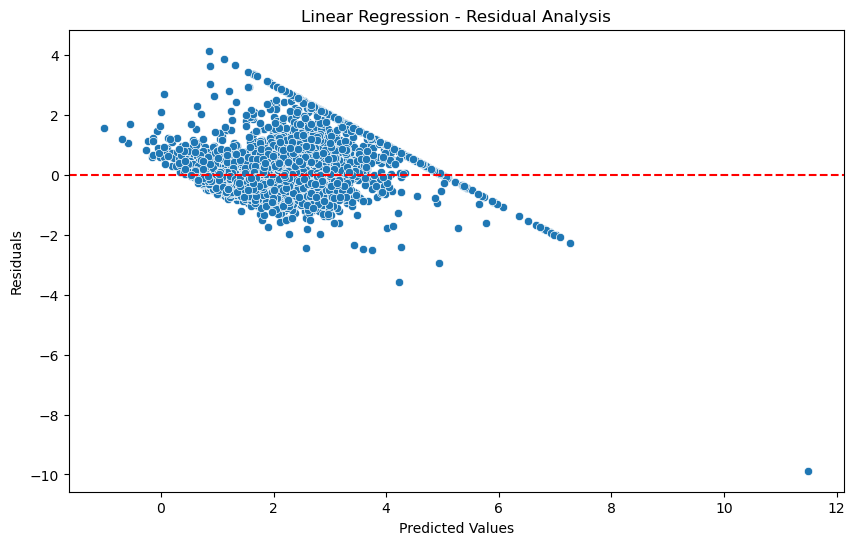

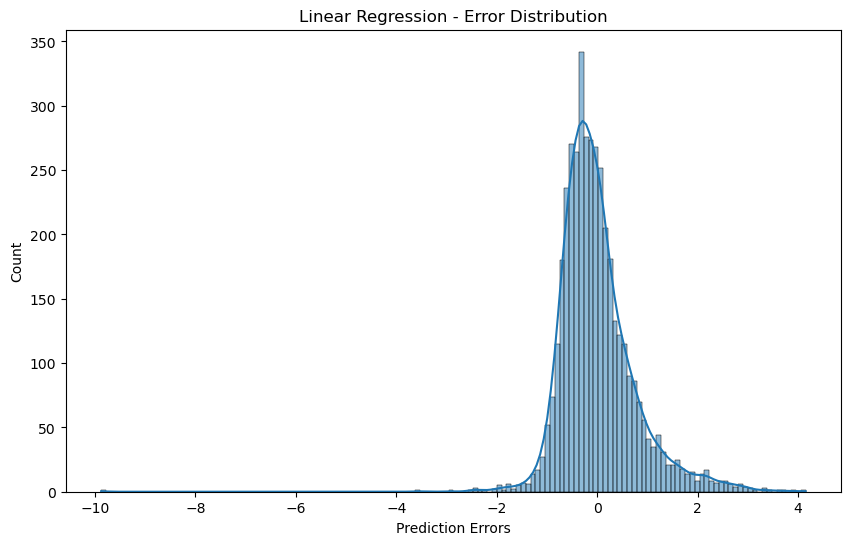

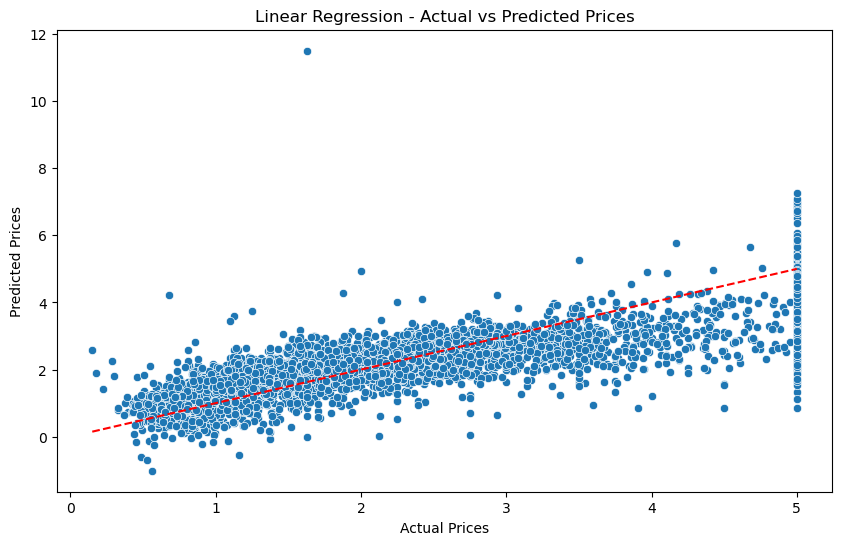


Evaluating Ridge Regression...

Ridge Regression - Training Metrics:
R²: 0.6125
MAE: 0.5287
MSE: 0.5179
RMSE: 0.7197
MAPE: 31.51%

Ridge Regression - Test Metrics:
R²: 0.5764
MAE: 0.5332
MSE: 0.5550
RMSE: 0.7450
MAPE: 31.95%


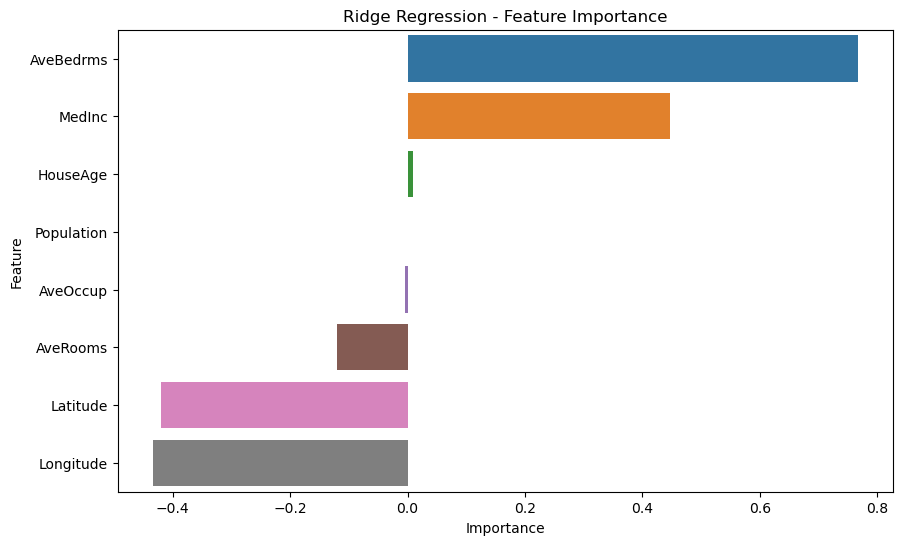

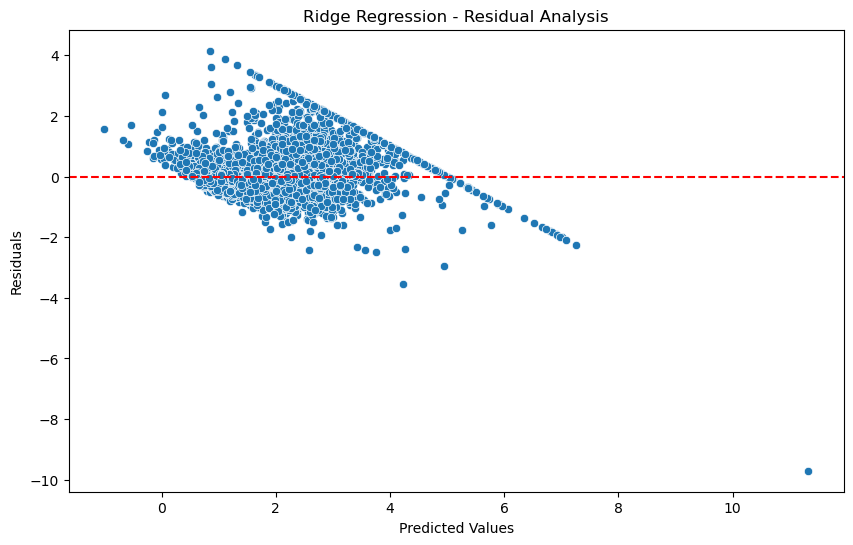

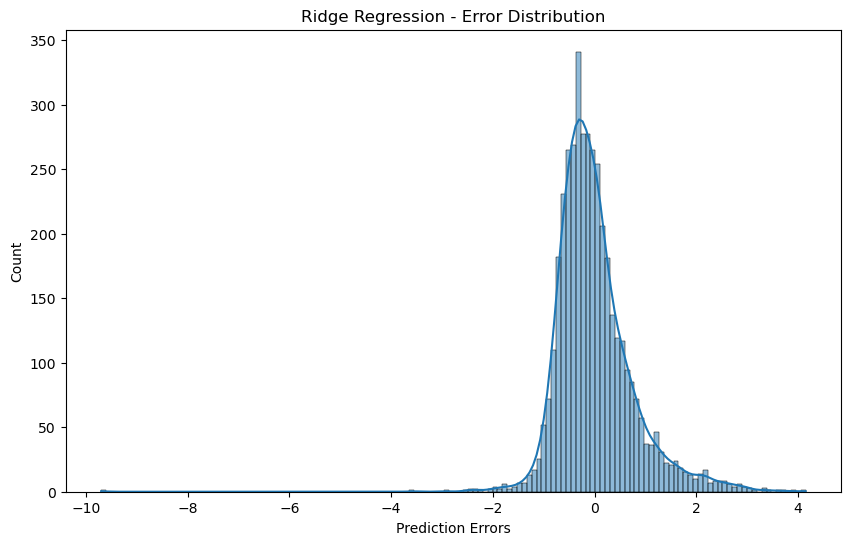

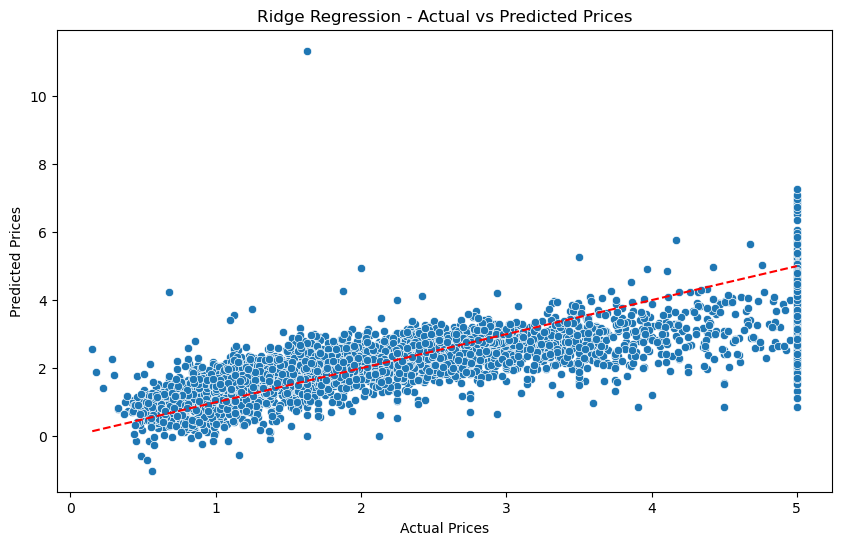


Evaluating Lasso Regression...

Lasso Regression - Training Metrics:
R²: 0.5489
MAE: 0.5790
MSE: 0.6030
RMSE: 0.7765
MAPE: 35.60%

Lasso Regression - Test Metrics:
R²: 0.5318
MAE: 0.5816
MSE: 0.6135
RMSE: 0.7833
MAPE: 36.16%


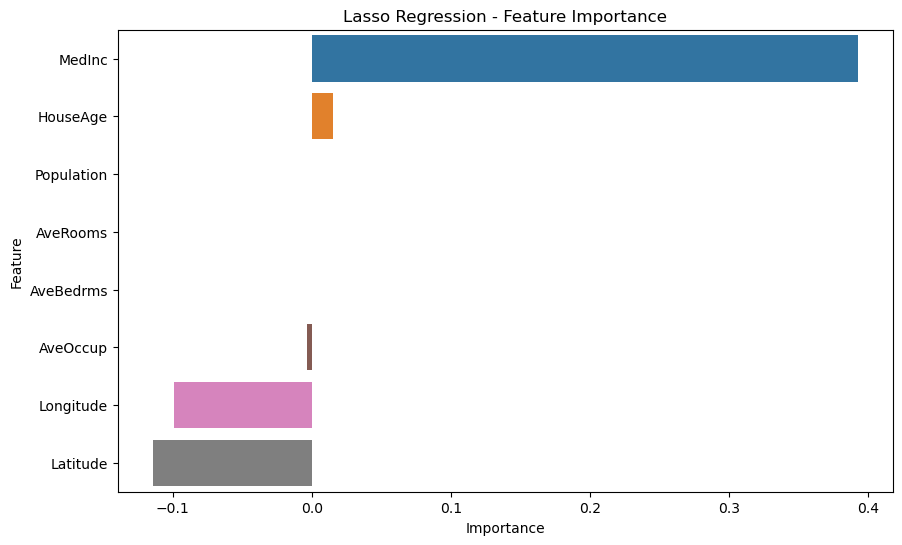

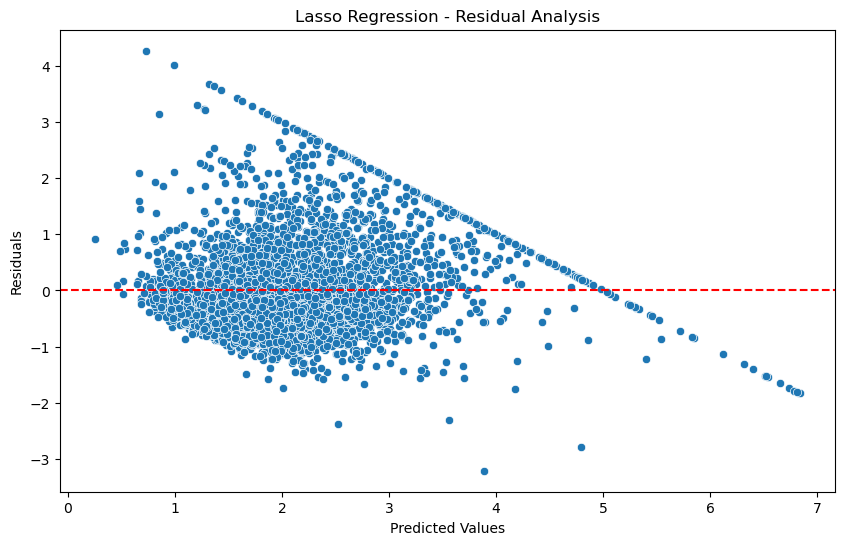

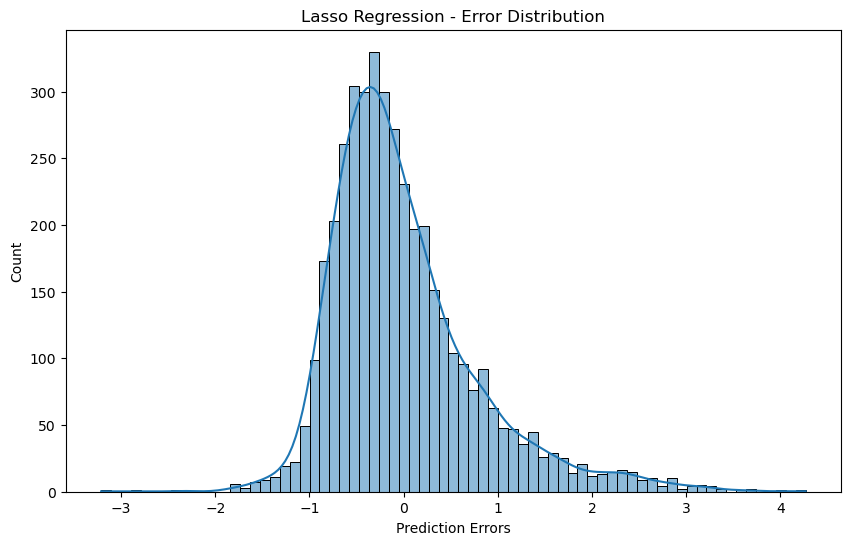

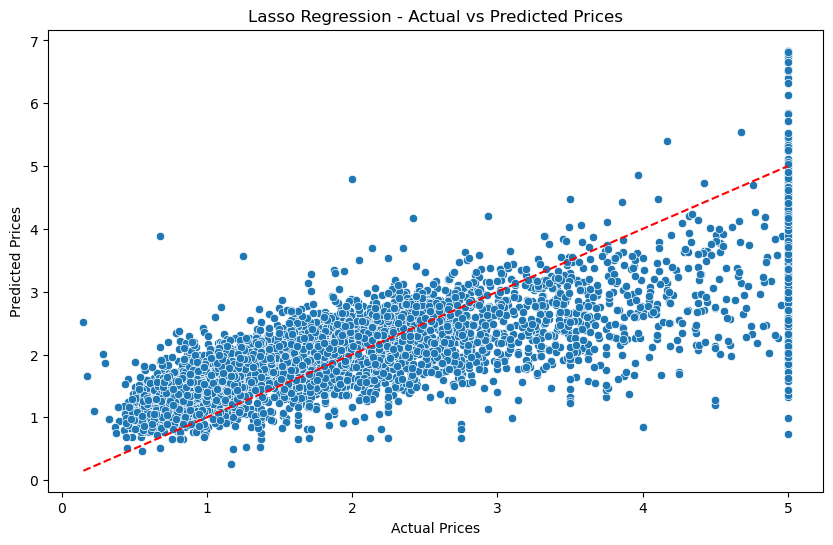


Evaluating Elastic Net...

Elastic Net - Training Metrics:
R²: 0.5902
MAE: 0.5468
MSE: 0.5477
RMSE: 0.7401
MAPE: 32.73%

Elastic Net - Test Metrics:
R²: 0.5733
MAE: 0.5487
MSE: 0.5592
RMSE: 0.7478
MAPE: 33.13%


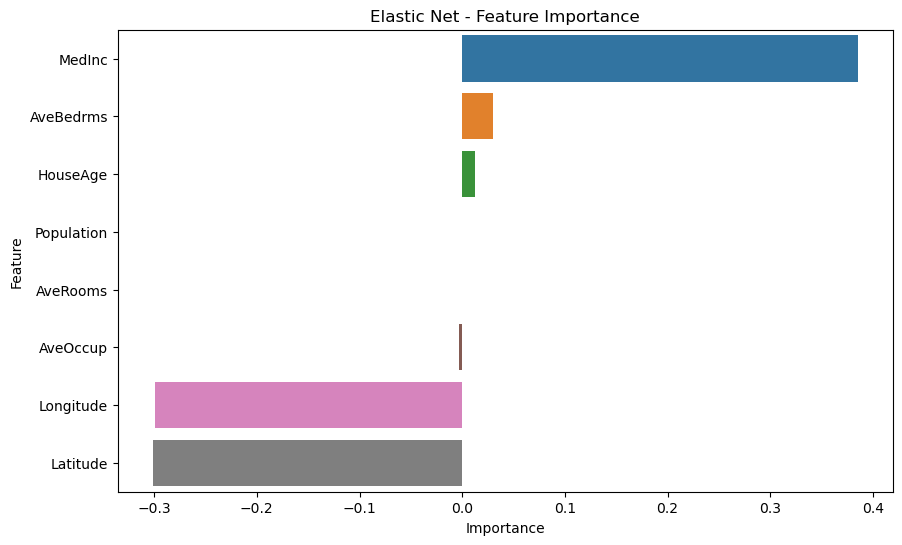

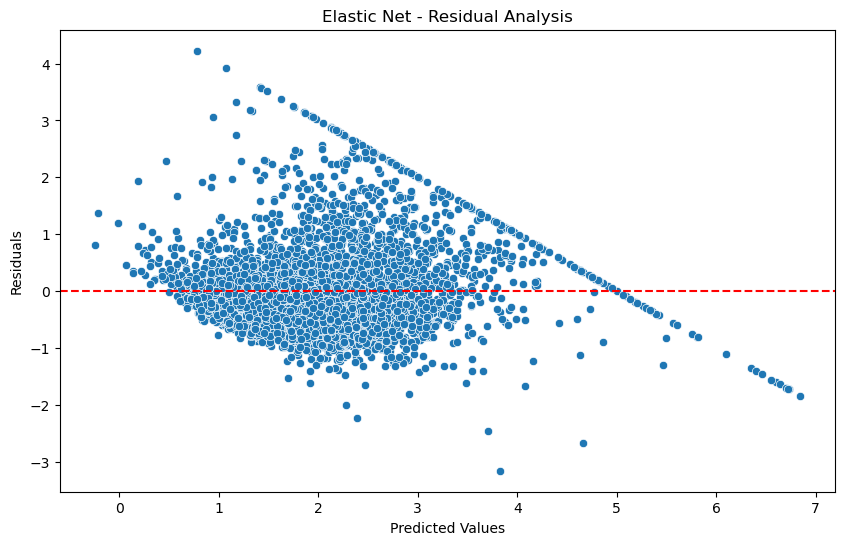

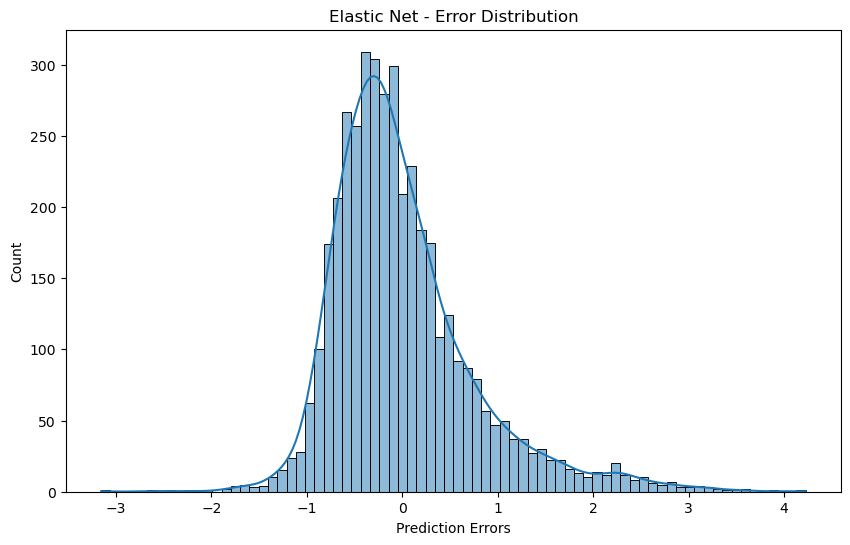

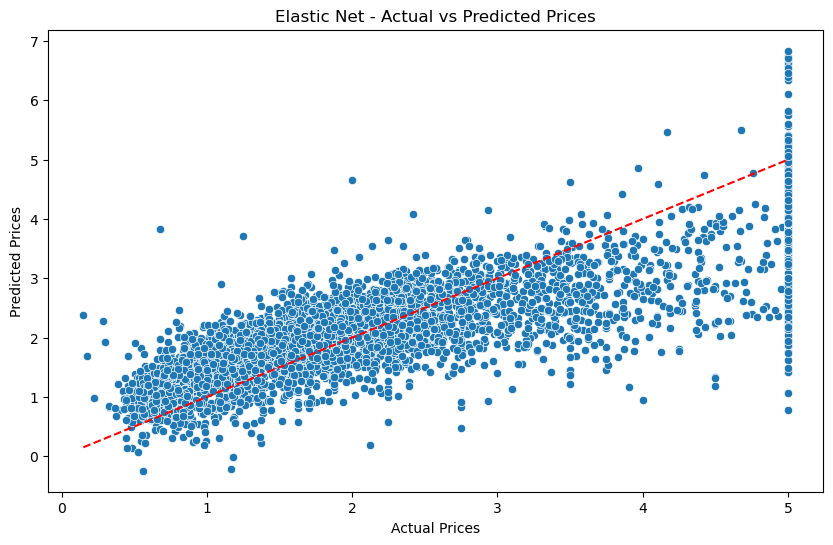

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing  # Ethical alternative
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Load ethical dataset
house_price_dataset = fetch_california_housing()

# Create DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data,
                                    columns=house_price_dataset.feature_names)
house_price_dataframe['PRICE'] = house_price_dataset.target

# Exploratory Data Analysis (EDA)
print("Dataset Shape:", house_price_dataframe.shape)
print("\nMissing Values:\n", house_price_dataframe.isnull().sum())
print("\nStatistical Summary:\n", house_price_dataframe.describe())

# Correlation Analysis
plt.figure(figsize=(12,10))
correlation = house_price_dataframe.corr()
sns.heatmap(correlation, annot=True, fmt='.1f', cmap='coolwarm', 
            annot_kws={'size':8}, cbar=True, square=True)
plt.title('Feature Correlation Matrix')
plt.show()

# Prepare Data
X = house_price_dataframe.drop('PRICE', axis=1)
y = house_price_dataframe['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet()
}

# Model Training with Hyperparameter Tuning using GridSearchCV for Ridge, Lasso, ElasticNet
param_grid = {
    'Ridge Regression': {
        'alpha': [0.1, 1.0, 10.0]
    },
    'Lasso Regression': {
        'alpha': [0.1, 1.0, 10.0]
    },
    'Elastic Net': {
        'alpha': [0.1, 1.0, 10.0],
        'l1_ratio': [0.2, 0.5, 0.8]
    }
}

best_models = {}

# Tuning Models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model

# Cross-Validation
for model_name, model in best_models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"\n{model_name} - Cross-Validated RMSE: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")

# Predictions & Performance Metrics
def print_metrics(actual, predicted, label):
    print(f"\n{label} Metrics:")
    print(f"R²: {r2_score(actual, predicted):.4f}")
    print(f"MAE: {mean_absolute_error(actual, predicted):.4f}")
    print(f"MSE: {mean_squared_error(actual, predicted):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(actual, predicted)):.4f}")
    print(f"MAPE: {np.mean(np.abs((actual - predicted) / actual)) * 100:.2f}%")
    

# Visualizations
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Print Metrics
    print_metrics(y_train, train_pred, f"{model_name} - Training")
    print_metrics(y_test, test_pred, f"{model_name} - Test")

    # Feature Importance (only for linear models)
    if hasattr(model, 'coef_'):
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.coef_
        }).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10,6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f'{model_name} - Feature Importance')
        plt.show()

    # Diagnostic Plots
    residuals = y_test - test_pred

    # Residual Plot
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=test_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Residual Analysis')
    plt.show()

    # Error Distribution
    plt.figure(figsize=(10,6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Prediction Errors')
    plt.title(f'{model_name} - Error Distribution')
    plt.show()

    # Prediction vs Actual Plot
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=y_test, y=test_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name} - Actual vs Predicted Prices')
    plt.show()


In [3]:
print("Dataset brief:", house_price_dataframe.head())

Dataset brief:    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
